# Example usage

Here we will demonstrate how to use the `zoo` package. There are five functions in the package: `line_plot`, `pre_process`, `para_optimize`, `std_Acc`, and `final_Model`. This package can make the supervised Machine Learning pipeline more simple.

In [8]:
import sys
sys.path.append( '..' )
from src.zoo import line_plot
from src.zoo import para_optimize
from src.zoo import pre_processing
from src.zoo import std_acc
from src.zoo import train_and_predict_model
# print(zoo.__version__)

## Import package

Here is an example of importing a function via `import` in your code

```python
from zoo.line_plot import * 
```

## pre_process

Pre_process can download the csv file from the link automatically and add headers to the dataset. In this tutorial, we will use the `Iris` dataset. It is a build-in dataset of `Scikit-learn`, but we can also import it from a link.

In [9]:
# Set up the link
link = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"

# Define the header
header = ["sepal_length","sepal_width","petal_length","petal_width","variety"]

# pre_process the data (drop the original header)
iris = pre_processing.pre_process(link, header).drop(0)

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
1,5.1,3.5,1.4,.2,Setosa
2,4.9,3,1.4,.2,Setosa
3,4.7,3.2,1.3,.2,Setosa
4,4.6,3.1,1.5,.2,Setosa
5,5,3.6,1.4,.2,Setosa


The column names are renamed to our defined headers in the result data frame.

## para_optimize

The `para_optimize` function can automatically run tuning hyperparameter process in a data analysis workflow. It is assumed that the model you are using is one of the followings in `scikit-learn` package: `KNeighborsClassifier`, `DecisionTreeClassifier`, `SVM`, and `LogisticRegression`, which are the most basic and commonly used supervised machine learning classification models. To use the function, a well-defined model is required, as well as a defined parameter range. A number of the validation folder is also needed, and it is normally set to 5 or 10, depends on the size of the dataset. The datasets are the predictors and target sets. In this tutorial, only a parameter optimization on a KNN model is demonstrated. We will optimize it based on the Iris data we imported previously.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create the predictor (X) and target (y) dataset
X = iris[["sepal_length","sepal_width","petal_length","petal_width"]]
y = iris["variety"]

# Create train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [11]:
# Create the model
knn = KNeighborsClassifier()

# Create parameter range
k_vals = list(range(1, 21))
param_grid_knn = {"n_neighbors" : k_vals}

# Get the best hyperparameter
best_para = para_optimize.para_optimize(knn, param_grid_knn, 5, X_train, y_train)

best_para

{'n_neighbors': 7}

The result is a dictionary containing the best hyperparameter you chose to optimize.

## final_Model

This function integrates the most commonly used training and fitting process in a data analysis process using Machine Learning methods. The algorithm is required to be among the followings in `scikit-learn` package: `KNeighborsClassifier`, `DecisionTreeClassifier`, `SVM`, and `LogisticRegression`. A hyperparameter is also required. It can be obtained by using `para_optimize` function in this package. The training and testing data which are split into predictors and target are also needed for this function. The full predictors and targets data are also required to fit the model. In this tutorial, we will continue to use the Iris data and KNN model we already defined.

In [12]:
final_knn_model = train_and_predict_model.final_Model("KNN", 7, X_train, X_test, y_train, y_test, X, y)

KNN INFO: So the accuracy score for K = 7 is 0.9666666666666667

KNN Cross Validate: 

fit_time       0.002256
score_time     0.003389
test_score     0.983333
train_score    0.979167
dtype: float64

KNN Classification report: 

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        16
  Versicolor       1.00      0.80      0.89         5
   Virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30



The result contains the basic scores of the model.

## std_Acc

This function generates standard deviation of predicted array and observed array associated with number of discretization k in KNN, Decision Tree, or other model with discrete hyperparameter models. It is another approach to find the best parameter of the model to use mean and standard deviation of the series of accuracy. The predicted values and test values are required to run this function. We will continue to work on the Iris data and the KNN model. To make it easy to understand, we will fit the model again without using `final_Model` function.

In [13]:
import sklearn.metrics as metrics
import numpy as np

# Fitting the model, and predict the value
Ks = 50
mean_acc = np.zeros((Ks-1))
sd_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

In [14]:
sd_acc = std_acc.std_Acc(yhat,y_test,Ks)

These results can be used to generate a accuracy plot using `line_plot` function in this package.

## line_plot

The `line_plot` function can plot a linear relationship nicely given a series of defined parameters. It is useful in visualize the data analysis result. It it specifically designed to visualize the accuracy distribution of the Zoo analysis. The input is mostly from the `std_Acc` function. We will use the results from the previous parts in this function.

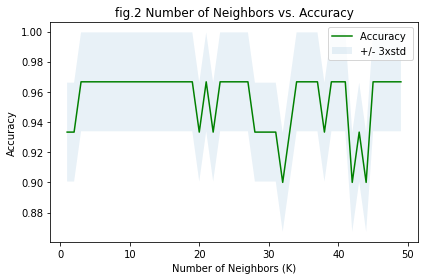

In [15]:
line_plot.line_plot(Ks, mean_acc, sd_acc, "Number of Neighbors (K)", "Accuracy", "fig.2 Number of Neighbors vs. Accuracy");